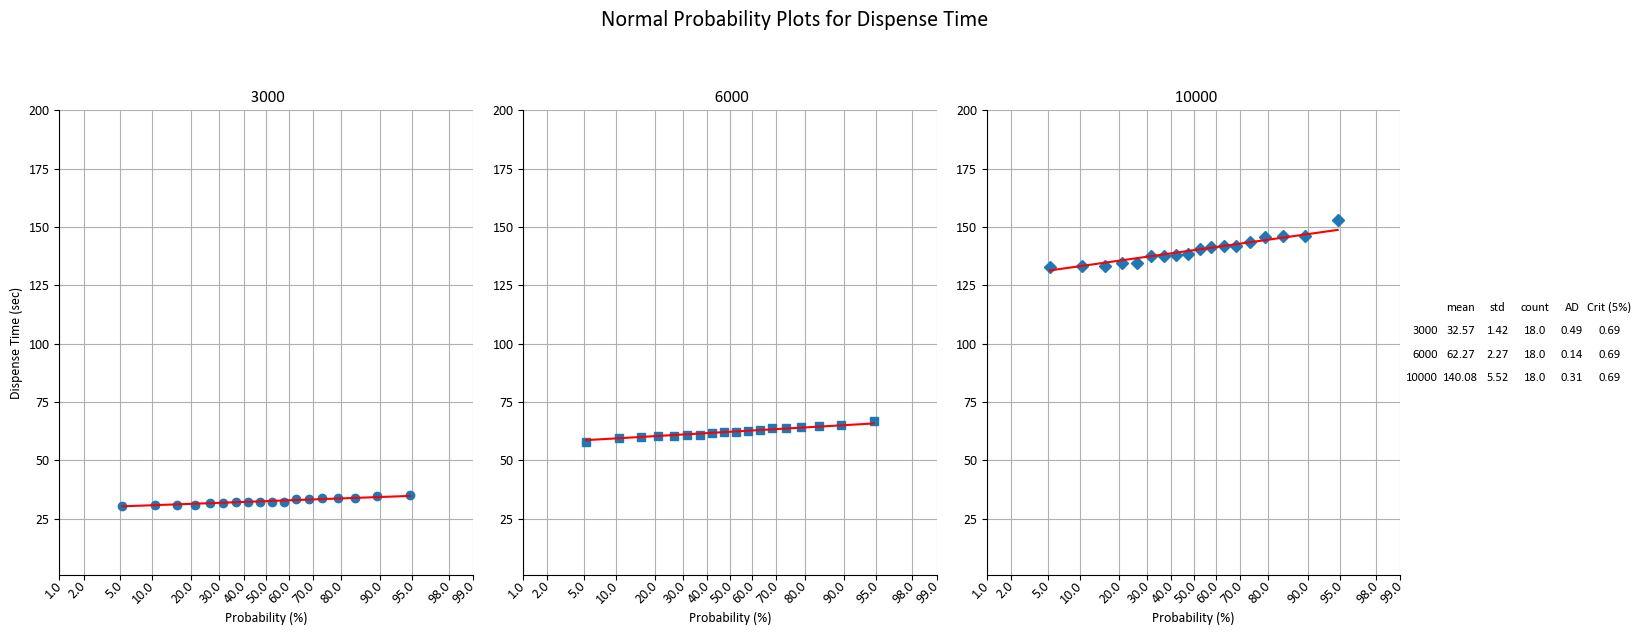

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import anderson, norm
from statsmodels.graphics.gofplots import ProbPlot

# Define the datasets in a dictionary
data = {
    '3000': pd.Series([34, 32.4, 33.4, 34.1, 32, 31, 35, 32, 31, 30.5, 34.8, 30.9, 31.6, 32, 34.1, 32.3, 33.5, 31.6]),
    '6000': pd.Series([61, 62, 63.2, 58, 61.6, 65, 60.5, 64, 67, 63.7, 60.4, 59.6, 64.9, 62.6, 64.2, 59.9, 62.3, 61]),
    '10000': pd.Series([133, 153.2, 138.5, 141.7, 140.5, 137.8, 137.7, 145.7, 134.8, 146.2, 146.2, 133.4, 143.6, 138.2, 134.6, 142, 141.3, 133.1])
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Define possible markers
markers = ['o', 's', 'D']  

# Update matplotlib rcParams to use Arial font
plt.rcParams['font.family'] = 'Calibri'

# Create a figure with subplots for each dataset
fig, axs = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(16, 6))

for i, dataset in enumerate(df.columns):
    data = df[dataset].dropna()  # Drop NaN values

    # Create the ProbPlot instance
    pp = ProbPlot(data, dist=norm)

    # Select the correct subplot
    ax = axs[i]
    
    # Plot the probability plot with specified marker
    pp.probplot(line='s', ax=ax, marker=markers[i % len(markers)], label=dataset)

    ax.set_title(f' {dataset}')  # Set subplot title
    ax.set_ylabel("")
    ax.set_xlabel("Probability (%)")
    ax.set_ylim(bottom=1, top=200)  # Adjust ylim as needed

    # Set y-axis label only for the first subplot
    if i == 0:
        ax.set_ylabel("Dispense Time (sec)")
    
    sns.despine()

# Add a grid to each subplot
for ax in axs:
    ax.grid(True, which='both')

# Print descriptive statistics and Anderson-Darling test values
descriptive_stats = df.describe().transpose()[['mean', 'std', 'count']]
anderson_results = {}

for col in df.columns:
    anderson_result = anderson(df[col])
    descriptive_stats.loc[col, 'AD'] = anderson_result.statistic  # Add AD statistic to descriptive stats
    descriptive_stats.loc[col, 'Crit (5%)'] = anderson_result.critical_values[2]  # Access the 5% critical value

# Adjust the layout to position the descriptive statistics table to the right
plt.subplots_adjust(right=0.9)  # Adjust the overall plot layout

# Define bbox parameters for the table
table_bbox = [1.1, 0.4, 0.45, 0.2]  # [x, y, width, height]
cell_text = np.round(descriptive_stats.values, 2)

# Ensure 'count' column is displayed as an integer
cell_text[:, 2] = cell_text[:, 2].astype(int)

# Create and style the table without borders
stats_table = plt.table(cellText=cell_text,
                        colLabels=list(descriptive_stats.columns),
                        rowLabels=list(descriptive_stats.index),
                        cellLoc='center',
                        rowLoc='right',
                        loc='right',
                        bbox=table_bbox,
                        edges='open')  # Set edges to 'open' to remove borders

stats_table.auto_set_font_size(False)
stats_table.set_fontsize(9)

plt.suptitle('Normal Probability Plots for Dispense Time', y=1.05, fontsize=16)  # Add overall title above subplots
plt.tight_layout()
plt.show()
